In [1]:
import string
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import gensim 
import fasttext

from sklearn.decomposition import PCA
from gensim.models import FastText as FT_gensim
from gensim.test.utils import datapath
from gensim.models.wrappers import FastText as FT

%matplotlib inline
nltk.download('punkt')

unable to import 'smart_open.gcs', disabling that module
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\egapa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_excel("../pemilu.xlsx")
df

,id_pembuat,id_status,nama_pembuat,teks_status,gambar_status,url_komentar,waktu_status,id_komentar,id_user_komen,komentar,waktu_komen,label
0,23383061178,23383061178_10152076252911179,Bang Nafie,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076253441179,794948677210695,Oke pak boss!!,2014-06-05 03:55:15,positif
1,23383061178,23383061178_10152076252911179,Sumy Kakasyi Suhaimy,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076253906179,355122887988412,Jangan dusta,2014-06-05 03:55:29,negatif
2,23383061178,23383061178_10152076252911179,Roberto Red,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076253996179,297825977080553,PROBOWO is the WINNER of PEMILU 2014,2014-06-05 03:55:32,positif
3,23383061178,23383061178_10152076252911179,Sugiarman Arman,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076254066179,298708870333739,ilmu padi,2014-06-05 03:55:35,netral
4,23383061178,23383061178_10152076252911179,Rio Corps Taruna,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076254216179,1523715244533780,Hidup Pak Prabowo ..,2014-06-05 03:55:42,positif
...,...,...,...,...,...,...,...,...,...,...,...,...
3359,249750628565406,249750628565406_276917339182068,Anita Rizkia,"Dukungan anda semua adalah amanah, dan apapun ...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-07-09 03:19:51,276891429184659_276927652514370,967613349931842,salam 2 jari,2014-07-09 03:25:45,positif
3360,249750628565406,249750628565406_276917339182068,Ari Bin Abu Bakar,"Dukungan anda semua adalah amanah, dan apapun ...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-07-09 03:19:51,276891429184659_276918865848582,773356856051191,"Jujur, ketika Ane membuka Surat Suara tadi, An...",2014-07-09 03:21:40,negatif
3361,249750628565406,249750628565406_276917339182068,Agek James,"Dukungan anda semua adalah amanah, dan apapun ...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-07-09 03:19:51,276891429184659_276921042515031,710343512387954,BAPAK JOKOWI KAMI SEMUA RAKYAT INGIN BAPAK JD ...,2014-07-09 03:24:02,positif
3362,249750628565406,249750628565406_276917339182068,ChairudinDr Humaniora,"Dukungan anda semua adalah amanah, dan apapun ...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-07-09 03:19:51,276891429184659_276931322514003,10152763210314600,"Tanda2 alam, pemilu 2day on 9 Juli (9-7= 2) ,...",2014-07-09 03:26:36,positif


In [3]:
import re
import string

nltk.download('punkt')

komentar = df['komentar'].astype(str)

#Lower case
komentar = komentar.apply(lambda x: x.lower())

#Remove URL
komentar = komentar.apply(lambda x: re.sub('https?://[A-Za-z0-9./]+','',x))
komentar = komentar.apply(lambda x: re.sub('http?://[A-Za-z0-9./]+','',x))

#Remove Number
komentar = komentar.apply(lambda x: re.sub(r"\d", "", x))

#Before Punctuation
komentar = komentar.apply(lambda x: re.sub(r'(?<=[,.])(?=[^\s])', r' ', x))

#Punctuation
komentar = komentar.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

#Remove Non Alphanumeric
komentar = komentar.apply(lambda x: re.sub(r'([^\s\w]|_)+', '', x))

#Tokenizing
komentar = komentar.apply(lambda x: nltk.tokenize.word_tokenize(x))

komentar

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\egapa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0                                        [oke, pak, boss]
1                                         [jangan, dusta]
2                  [probowo, is, the, winner, of, pemilu]
3                                            [ilmu, padi]
4                                   [hidup, pak, prabowo]
                              ...                        
3359                                        [salam, jari]
3360    [jujur, ketika, ane, membuka, surat, suara, ta...
3361    [bapak, jokowi, kami, semua, rakyat, ingin, ba...
3362    [tanda, alam, pemilu, day, on, juli, hasil, je...
3363    [dosa, dosa, prabowo, admin, tolak, lupa, mari...
Name: komentar, Length: 3364, dtype: object

In [4]:
model_gensim = FT_gensim(size=300, 
                         negative=5, 
                         min_count=1, 
                         min_n=2, 
                         max_n=3, 
                         sg=0, 
                         sorted_vocab=1, 
                         word_ngrams=1, 
                         window=5, 
                         callbacks=(),
                         ns_exponent=0.75, 
                         cbow_mean=0, 
                         workers=5, 
                         alpha=0.1, 
                         min_alpha=0.025)

In [5]:
model_gensim.build_vocab(komentar)

In [6]:
total_examples = model_gensim.corpus_count
model_gensim.train(
    sentences=komentar,
    total_examples=total_examples, 
    epochs = 100
)

In [7]:
model_gensim.save('XGB.bin')
loaded_model = FT_gensim.load('XGB.bin')

In [8]:
loaded_model.wv.similarity("bagus", "buruk")

0.3804822

In [9]:
loaded_model.wv.distance("bagus", "jelek")

0.7016387581825256

In [10]:
loaded_model.wv.most_similar(positive="jelek", topn=5)

[('jelekan', 0.8802781105041504),
 ('elek', 0.8547999858856201),
 ('jelekin', 0.8545606732368469),
 ('dijelekjelekkan', 0.8218790292739868),
 ('menjelekjelekan', 0.8163007497787476)]

In [11]:
loaded_model.wv.most_similar_cosmul(positive="bagus", negative=None, topn=5)

[('agus', 0.9291471838951111),
 ('tokobagus', 0.9229384660720825),
 ('bagusnya', 0.9105827212333679),
 ('bagusan', 0.8943366408348083),
 ('gus', 0.8666254281997681)]

In [12]:
similar_words = {search_term: [item[0] for item in loaded_model.wv.most_similar([search_term], topn=5)]
                for search_term in ['mantap', 'keren', 'bagus', 'jelek', 'parah', 'cepat']}
similar_words

{'mantap': ['mantapp', 'mantappop', 'mantappp', 'mantapppz', 'mantaaap'],
 'keren': ['kerenn', 'kerenz', 'kerennn', 'kerena', 'kerennnn'],
 'bagus': ['agus', 'tokobagus', 'bagusnya', 'bagusan', 'gus'],
 'jelek': ['jelekan', 'elek', 'jelekin', 'dijelekjelekkan', 'menjelekjelekan'],
 'parah': ['parahh', 'pasrah', 'para', 'parade', 'arah'],
 'cepat': ['crpat', 'cepatkan', 'tepat', 'cepet', 'dpat']}

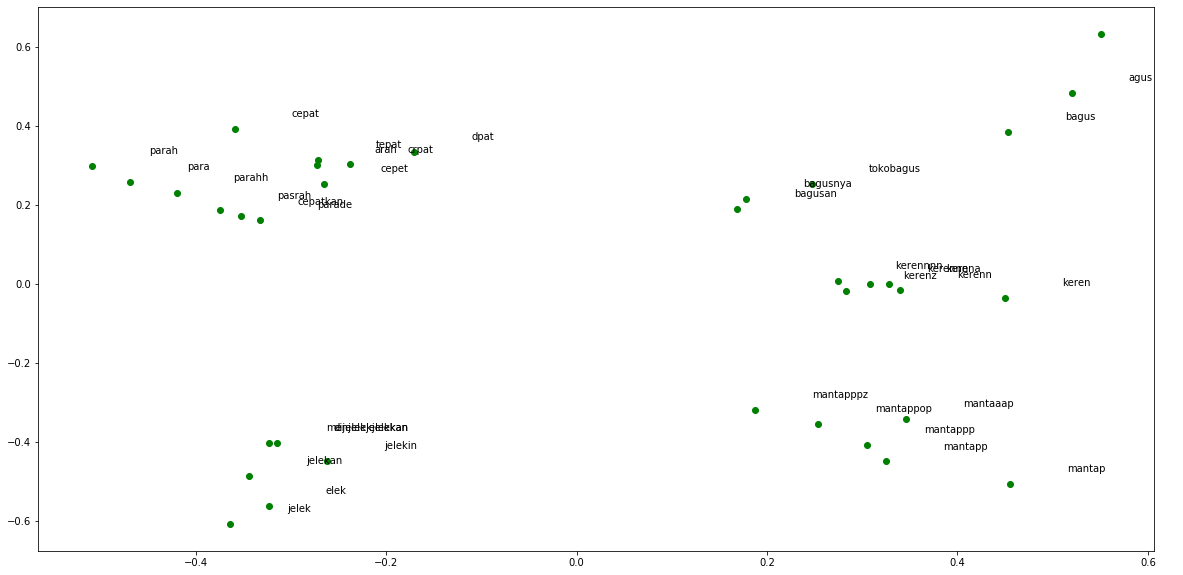

In [13]:
words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = loaded_model.wv[words]

pca = PCA(n_components=2)
np.set_printoptions(suppress=True)
P = pca.fit_transform(wvs)
labels = words

plt.figure(figsize=(20, 10))
plt.scatter(P[:, 0], P[:, 1], c='green', edgecolors='g')
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')